# Plots, Interaction, Animation in Julia
- categories: [Julia, Turing, Changepoint]

In [1]:
#collapse
using Turing
using Bijectors
using Gadfly
using DataFrames, DataFramesMeta
using StatsPlots
using Interact:@manipulate

In [5]:
model_traces = DataFrame(
    τ = [50, 60, 70, 100], 
    μ_1 = [5, 10, 20, 40], 
    μ_2 = [10, 15, 22, 29], 
    σ = [1, 2, 3, 4]
)

,τ,μ_1,μ_2,σ
,Int64,Int64,Int64,Int64
1,50,5,10,1
2,60,10,15,2
3,70,20,22,3
4,100,40,29,4


In [6]:
model_traces[1,:]

,τ,μ_1,μ_2,σ
,Int64,Int64,Int64,Int64
1,50,5,10,1


In [78]:
function trace_model_overlay(τ, μ_1, μ_2, σ)
    model_col = color("deeppink1")
    return Gadfly.plot(
        layer(x=[0, τ, τ, 1000], y=[μ_1, μ_1, μ_2, μ_2], 
            Geom.path, Theme(alphas=[.5], default_color=model_col)), 
        layer(x=[0, τ], ymin = [μ_1 - 2σ, μ_1 - 2σ], ymax = [μ_1 + 2σ, μ_1 + 2σ], 
            Geom.ribbon, Theme(alphas=[.5], default_color=model_col)),
        layer(x=[τ, 1000], ymin = [μ_2 - 2σ, μ_2 - 2σ], ymax = [μ_2 + 2σ, μ_2 + 2σ],
            Geom.ribbon, Theme(alphas=[.5], default_color=model_col)),
        layer(raw_data, x=:x, y=:y, Geom.point)
    )
end

trace_model_overlay (generic function with 1 method)

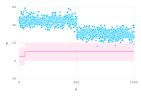

In [79]:
mt1 = model_traces[1,:]
trace_model_overlay(mt1.τ, mt1.μ_1, mt1.μ_2, 5)

In [74]:
#import Pkg; Pkg.add("WebIO")
using WebIO
#WebIO.install_jupyter_nbextension()

In [111]:
df = chain_df #DataFrame(τ=[300,400,500,600], μ_1=[30,40,45, 50], μ_2 = [10,20,30,40], σ = [1,2,3,4])
@manipulate for i=1:50
    trace_model_overlay(df[i,:τ], df[i,:μ_1_scaled], df[i,:μ_2_scaled], df[i,:σ])
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["i"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 50,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
25, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/brad/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/brad/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/brad/.julia/packages/InteractBase/sOe2Z/src/../assets/all.js"), Asset("css", nothing, "/Users/brad/.julia/packages/InteractBase/sOe2Z/src/../assets/style.css"), Asset("css", nothing, "/Users/brad/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000010c81cb50, Task (runnable) @0x000000010c81cb50), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"37\",\"3

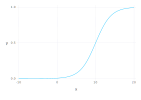

In [83]:
logit = bijector(Beta())   # bijection:  (0, 1)  →  ℝ
inv_logit = inv(logit)     # bijection:       ℝ  →  (0, 1)

function sigm(μ, σ, x)
    return inv_logit(σ*(x - μ))
end;

x=-10:.1:20
df = DataFrame(y=sigm.(10, .5, x), x=x)
Gadfly.plot(df, x=:x, y=:y, Geom.line)

See? It's a smooth step function! That means we'll get gradients galore! We use that to interpolate between the two likelihoods we want to step between:

$$\begin{aligned}
\tau &\sim \mathrm{Uniform}(1, \mathrm{length}(\mathcal{D}))\\
\mu_1, \mu_2 &\sim \mathrm{Normal}(\mu_0, \sigma_0)\\
\sigma &\sim \mathrm{HalfNormal}(0, 10)\\
\zeta_i &= \mathrm{sigm}(a, \tau, i)\\
d_i &\sim \mathrm{Normal}((1 - \zeta_i) \mu_1 + \zeta_i \mu_2, \sigma)
\end{aligned}
$$

In Turing:

In [84]:
@model function changepoint(data)
    # priors
    spec = 0.01
    μ_1 ~ Normal(0, 2)
    μ_2 ~ Normal(0, 2)
    τ ~ Uniform(1, 1000)
    σ ~ truncated(Normal(1, 2), 0, 20)
    
    # likelihood
    for i in 1:length(data)
        switch = sigm(τ, spec, i)
        z = (1-switch) * μ_1 + switch * μ_2
        data[i] ~ Normal(z, σ)
    end
end;

Now we're ready to roll - I had to fuss with both $\epsilon$ and `spec` before landing on standardizing the data as the most important first step, so you may find better hyperparameter values.

In [92]:
print("mean(c): $(mean(c))\nstd(c): $(std(c))")

mean(c): 37.397358366826424
std(c): 8.445839917312068

In [99]:
# Standardizing data makes your sampler much happier!
std_c = (c .- mean(c)) ./ std(c);

# Settings of the Hamiltonian Monte Carlo (HMC) sampler.
iterations = 100
ϵ = 0.01
τ = 2;

cp_chain2 = sample(
    changepoint(std_c), 
    HMC(ϵ, τ), iterations, 
    progress=true, drop_warmup=false);

Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01


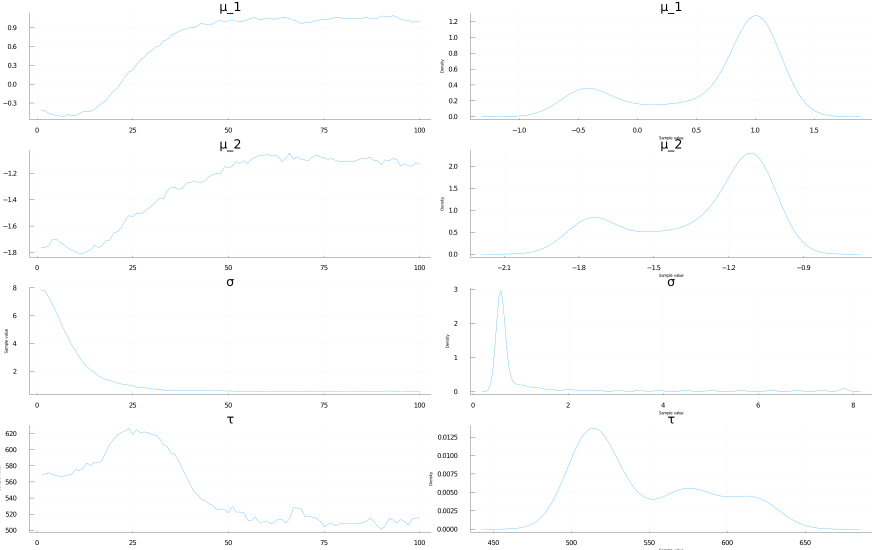

In [100]:
#collapse
StatsPlots.plot(cp_chain2, size=(3500,2200), titlefont = (34), tickfont=(18), guide="")

In [102]:
chain_df = DataFrame(cp_chain2)[1:50,:]

,iteration,chain,acceptance_rate,hamiltonian_energy,hamiltonian_energy_error
,Int64,Int64,Float64,Float64,Float64
1,1,1,0.701771,3000.71,0.0
2,2,1,0.672909,2995.76,0.0
3,3,1,0.749373,2999.14,0.288519
4,4,1,0.708969,2940.89,0.343944
5,5,1,0.720504,2863.34,0.327804
6,6,1,0.692717,2785.51,0.367133
7,7,1,0.748157,2680.27,0.290143
8,8,1,0.799339,2571.39,0.22397
9,9,1,0.963158,2467.18,0.0375377


In [109]:
chain_df = @transform(
    chain_df, 
    μ_1_scaled = :μ_1 .* std(c) .+ mean(c), 
    μ_2_scaled = :μ_2 .* std(c) .+ mean(c))

,iteration,chain,acceptance_rate,hamiltonian_energy,hamiltonian_energy_error
,Int64,Int64,Float64,Float64,Float64
1,1,1,0.701771,3000.71,0.0
2,2,1,0.672909,2995.76,0.0
3,3,1,0.749373,2999.14,0.288519
4,4,1,0.708969,2940.89,0.343944
5,5,1,0.720504,2863.34,0.327804
6,6,1,0.692717,2785.51,0.367133
7,7,1,0.748157,2680.27,0.290143
8,8,1,0.799339,2571.39,0.22397
9,9,1,0.963158,2467.18,0.0375377


In [103]:
chain_df[:μ_1_scaled] = chain_df[:μ_1] * std(c) + mean(c)
chain_df[:μ_2_scaled] = chain_df[:μ_2] * std(c) + mean(c)

LoadError: ArgumentError: syntax df[column] is not supported use df[!, column] instead

:tada: Voilà! :tada: